In [11]:
import numpy as np
import pickle as pkl
from pydrive.drive import GoogleDrive
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [12]:
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive"
infile = open(DATA_PATH+'/features.pkl','rb')
features = pkl.load(infile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#features

In [91]:
#new feature_dictionary with modified feature key(changed location information)

new_features = {}

for key, value in features.items():
  new_key = key.replace('/home/saurav/Documents/ai-powered-ecommerce/images/train','/content/drive/MyDrive/dataset/train')
  new_features[new_key] = value

#print(new_features)


In [92]:
#load the model
model = EfficientNetB3()

#model restructure
#the purpose of using -2 in layer function is because we're not using last prediction layer i.e layer -1
#and the layer -2 is the layer before the prediction layer which we'll be using for output
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [105]:
image_path = (DATA_PATH+'/dataset/random_test_images/lehenga.png')
query_feature = {}
#loading the image
img = load_img(image_path, target_size=(300,300))

#converting image to numpy array
img = img_to_array(img)

#print(img.shape)
#reshape the image for the model
#here reshape is used to add the batch size dimension
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

#image preprocessing
img = preprocess_input(img)

#feature extraction
query_feature = model.predict(img, verbose=0)
query_feature = query_feature.flatten()

In [106]:
!ls /content/drive/MyDrive/dataset/random_test_images

chappal.jpeg  lehenga2.jpg  lehenga.png  shorts.jpg


In [107]:
query_feature

array([ 0.07295492, -0.12465174, -0.18821105, ..., -0.12211043,
       -0.12098059,  0.60822016], dtype=float32)

In [108]:
#accessing feature vectors from features dictionary
value = list(new_features.values())[31842]
print(value)

[ 1.0465979e-05 -7.7213518e-02  2.0817634e-01 ... -2.0346123e-01
  4.7465348e-01 -2.1822155e-01]


In [109]:
#euceledean distance similarity
distances = [np.linalg.norm(query_feature - value) for value in new_features.values()]

#cosine similarity
distances2 = [np.dot(query_feature, value) / (np.linalg.norm(query_feature) * np.linalg.norm(value)) for value in new_features.values()]

sorted_distances = sorted(distances)
sorted_distances2 = sorted(distances_2)
#print(distances)
#print(sorted_distances)
#print(sorted_distances2)

In [110]:
#for euceledean similarity
key_value = list(features.keys())[distances.index(sorted_distances[7])]
print(key_value)

/home/saurav/Documents/ai-powered-ecommerce/images/train/50907.jpeg


In [111]:
new_features_keys = list(new_features.keys())
#new_features_keys

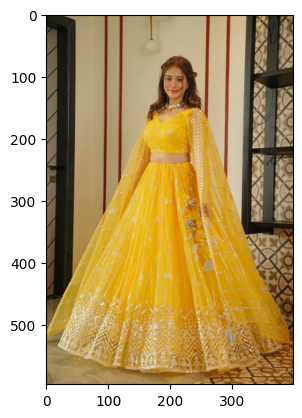

In [112]:
#query image
q_image = plt.imread(image_path)
plt.imshow(q_image)
plt.show()

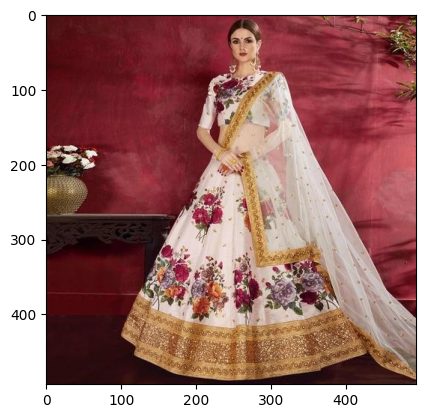

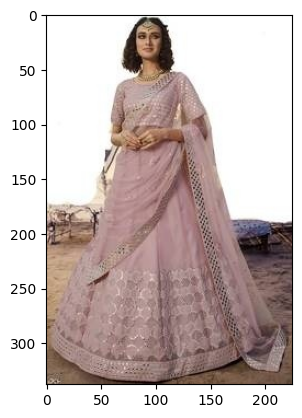

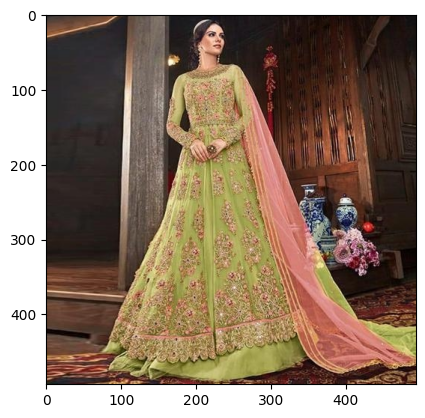

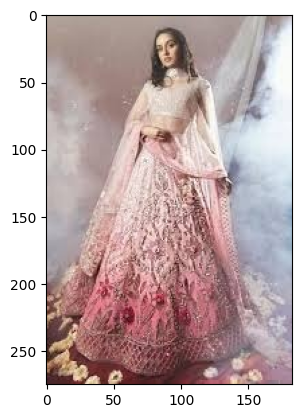

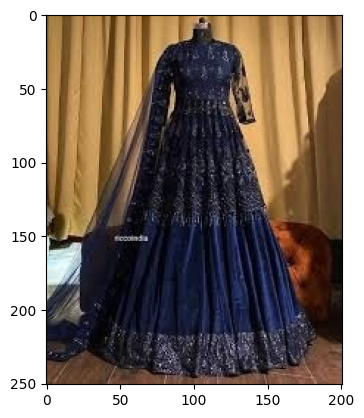

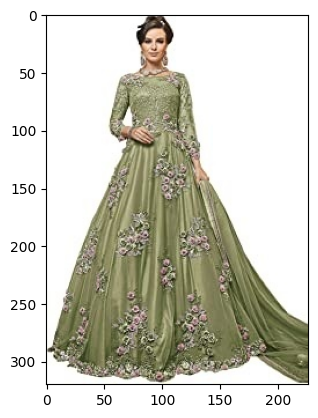

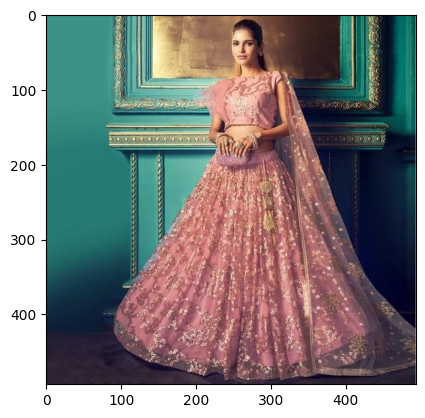

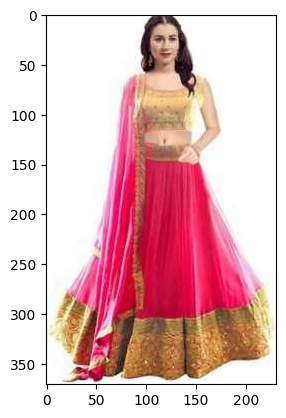

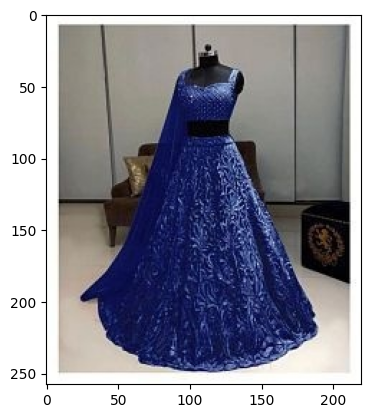

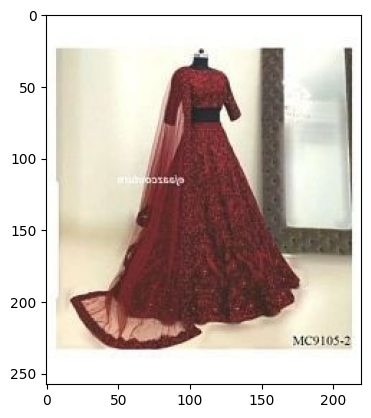

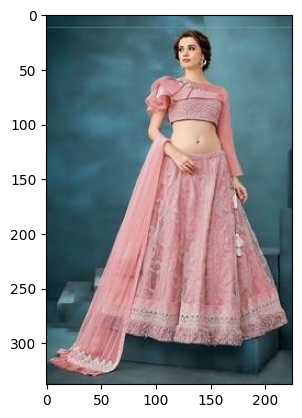

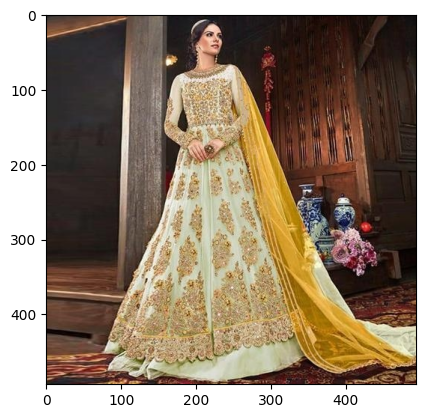

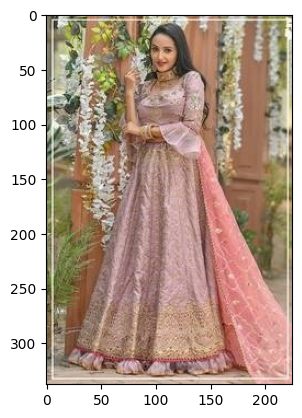

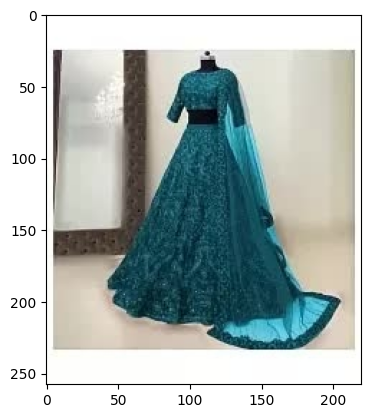

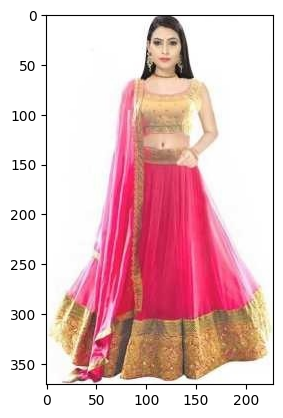

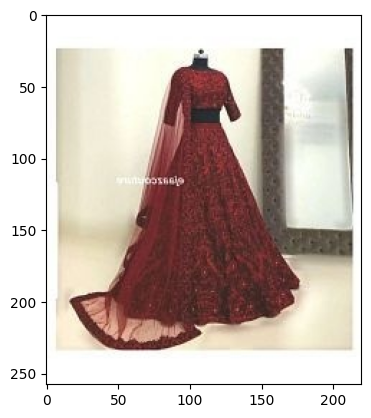

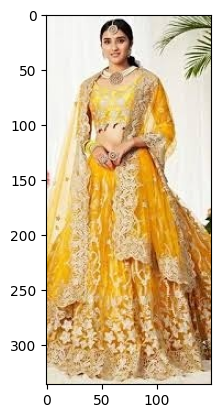

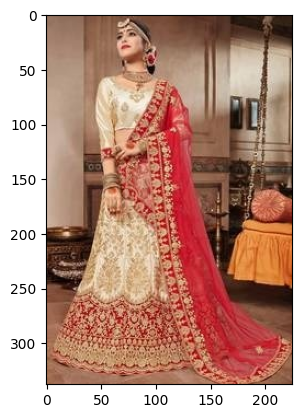

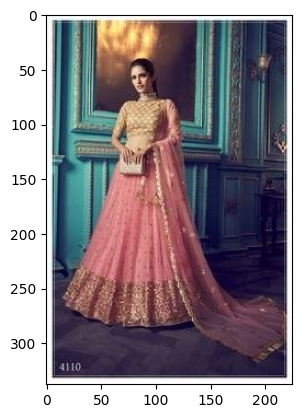

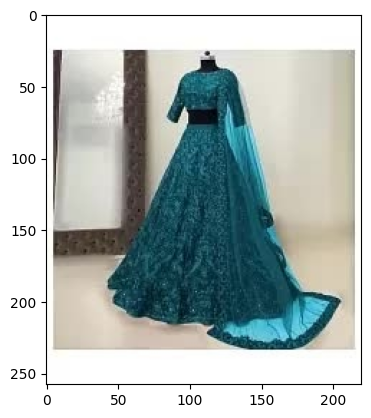

In [113]:
#searched image
for i in range(20):
  img = plt.imread(new_features_keys[distances.index(sorted_distances[i])])
  plt.imshow(img)
  plt.show()

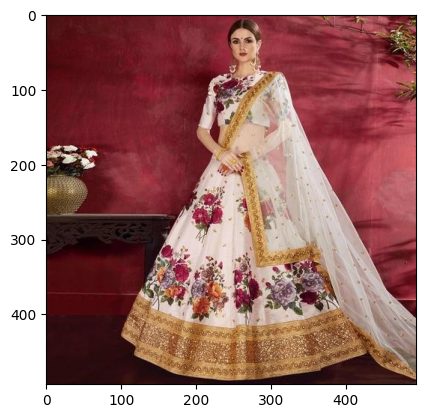

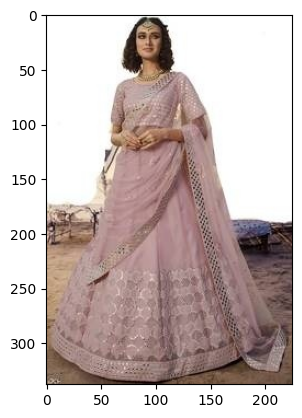

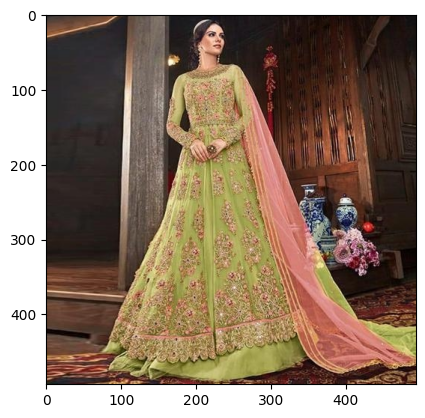

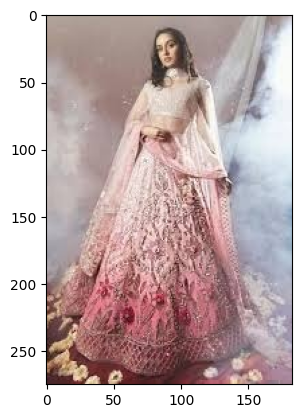

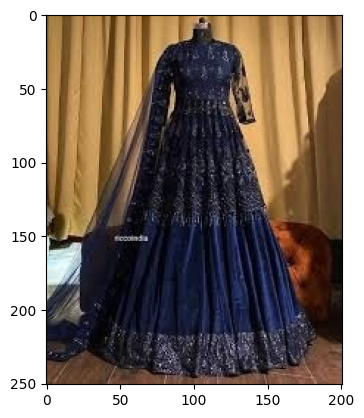

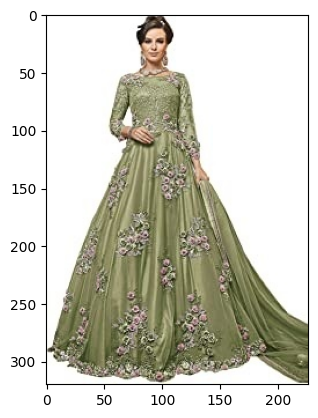

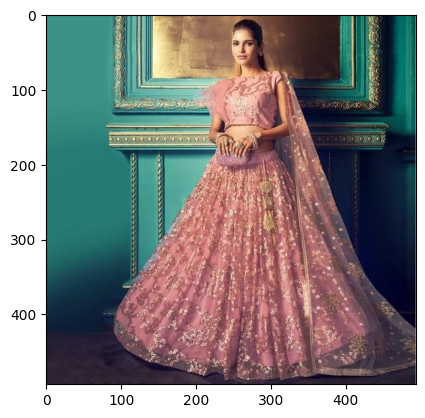

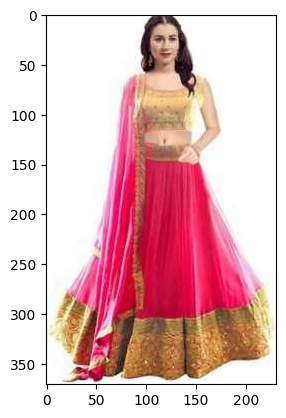

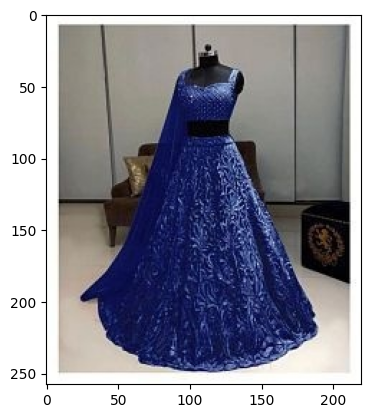

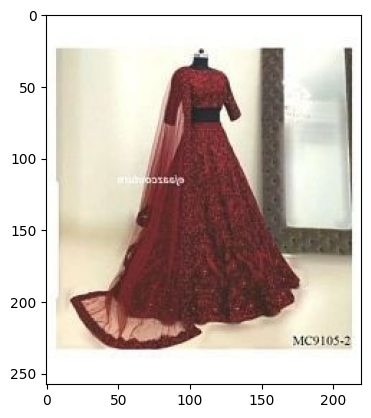

In [114]:
#exeution time decreased by few seconnds using list comprehension
images = [plt.imread(new_features_keys[distances.index(sorted_distances[i])]) for i in range(10)]

for img in images:
  plt.imshow(img)
  plt.show()

In [80]:
distances.index(sorted_distances[1])

5464

In [81]:
sorted_distances[0]

12.233268

In [82]:
distances.index(sorted_distances[1])

5464

In [28]:
sorted_distances[1]

7.3370767

In [29]:
#!ls /content/drive/MyDrive/dataset/train

In [30]:
image_path

'/content/drive/MyDrive/dataset/random_test_images/lehenga2.jpg'